<a href="https://colab.research.google.com/github/ncsu-landscape-dynamics/LAMP_assay_automation/blob/main/pytorch_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import os
import sys
import PIL
from PIL import Image
import glob
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import imageio
import scipy
import scipy.misc
import skimage.filters
import skimage.metrics
import pandas as pd
import pathlib

In [3]:
cd 'drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/collection/pytorch_practice'

/content/drive/.shortcut-targets-by-id/1-5I4VO21o4cSUAm5QhufEXgNX_wbZVfg/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/collection/pytorch_practice


In [4]:
wdir = pathlib.Path.cwd()

In [5]:
os.listdir()

['train_masks', 'validate_masks', 'train_img', 'validate_img']

In [6]:
nask_path = pathlib.Path.joinpath(wdir, 'train_masks')
vask_path = pathlib.Path.joinpath(wdir, 'validate_masks')
nimg_path = pathlib.Path.joinpath(wdir, 'train_img')
vimg_path = pathlib.Path.joinpath(wdir, 'validate_img')

In [20]:
n_mask = []
v_mask = []
n_img = []
v_img = []
n_img2 = []
v_img2 = []

In [25]:
for i in os.listdir(nask_path):
    n_mask.append(Image.open(os.path.join(nask_path, i)))

for i in os.listdir(vask_path):
    v_mask.append(Image.open(os.path.join(vask_path, i)))

In [26]:
for i in os.listdir(nimg_path):
    n_img.append(Image.open(os.path.join(nimg_path, i)))

for i in os.listdir(vimg_path):
    v_img.append(Image.open(os.path.join(vimg_path, i)))

In [19]:
len(n_mask+ v_mask)

24

In [27]:
#[ expression for item in list if conditional ]
n_img2 = [im.rotate(270, expand=True) if im.size == (5312, 2988) else im for im in n_img]

v_img2 = [im.rotate(270, expand=True) if im.size == (5312, 2988) else im for im in v_img]

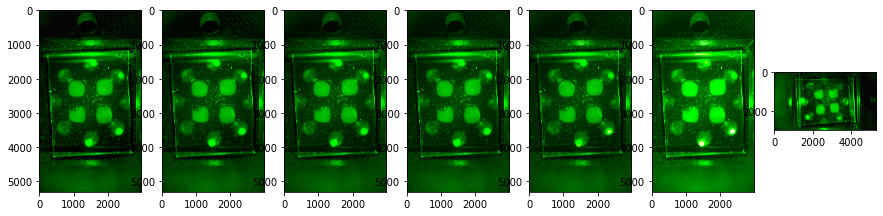

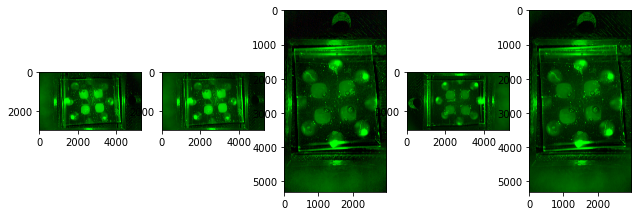

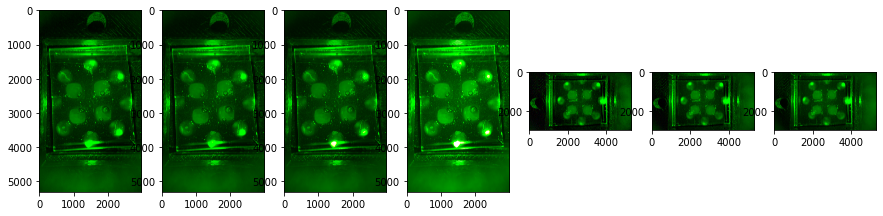

In [36]:
plt.figure(figsize=(15,60))
plt.subplot(1,7,1)
plt.imshow(n_img[0])
plt.subplot(1,7,2)
plt.imshow(n_img[1])
plt.subplot(1,7,3)
plt.imshow(n_img[2])
plt.subplot(1,7,4)
plt.imshow(n_img[3])
plt.subplot(1,7,5)
plt.imshow(n_img[4])
plt.subplot(1,7,6)
plt.imshow(n_img[5])
plt.subplot(1,7,7)
plt.imshow(n_img[6])
plt.figure(figsize=(15,60))
plt.subplot(2,7,1)
plt.imshow(n_img[7])
plt.subplot(2,7,2)
plt.imshow(n_img[8])
plt.subplot(2,7,3)
plt.imshow(n_img[9])
plt.subplot(2,7,4)
plt.imshow(n_img[10])
plt.subplot(2,7,5)
plt.imshow(n_img[11])
plt.figure(figsize=(15,60))
plt.subplot(3,7,1)
plt.imshow(n_img[12])
plt.subplot(3,7,2)
plt.imshow(n_img[13])
plt.subplot(3,7,3)
plt.imshow(n_img[14])
plt.subplot(3,7,4)
plt.imshow(n_img[15])
plt.subplot(3,7,5)
plt.imshow(n_img[16])
plt.subplot(3,7,6)
plt.imshow(n_img[17])
plt.subplot(3,7,7)
plt.imshow(n_img[18])

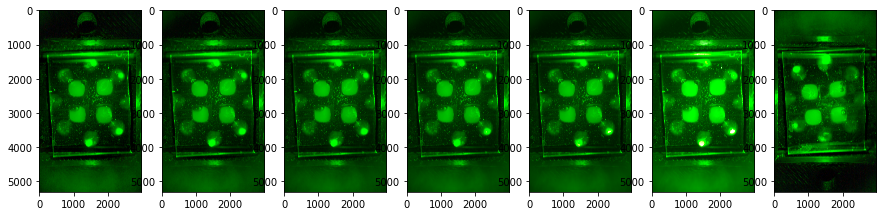

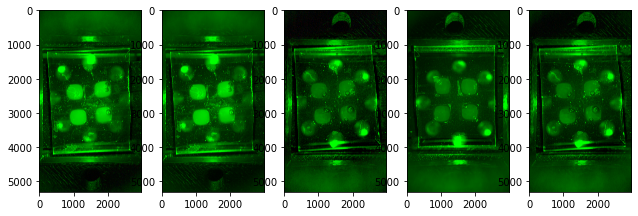

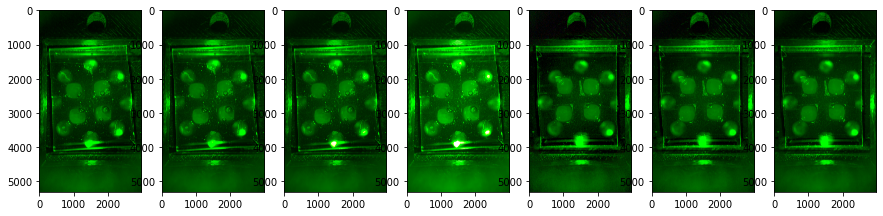

In [37]:
plt.figure(figsize=(15,60))
plt.subplot(1,7,1)
plt.imshow(n_img2[0])
plt.subplot(1,7,2)
plt.imshow(n_img2[1])
plt.subplot(1,7,3)
plt.imshow(n_img2[2])
plt.subplot(1,7,4)
plt.imshow(n_img2[3])
plt.subplot(1,7,5)
plt.imshow(n_img2[4])
plt.subplot(1,7,6)
plt.imshow(n_img2[5])
plt.subplot(1,7,7)
plt.imshow(n_img2[6])
plt.figure(figsize=(15,60))
plt.subplot(2,7,1)
plt.imshow(n_img2[7])
plt.subplot(2,7,2)
plt.imshow(n_img2[8])
plt.subplot(2,7,3)
plt.imshow(n_img2[9])
plt.subplot(2,7,4)
plt.imshow(n_img2[10])
plt.subplot(2,7,5)
plt.imshow(n_img2[11])
plt.figure(figsize=(15,60))
plt.subplot(3,7,1)
plt.imshow(n_img2[12])
plt.subplot(3,7,2)
plt.imshow(n_img2[13])
plt.subplot(3,7,3)
plt.imshow(n_img2[14])
plt.subplot(3,7,4)
plt.imshow(n_img2[15])
plt.subplot(3,7,5)
plt.imshow(n_img2[16])
plt.subplot(3,7,6)
plt.imshow(n_img2[17])
plt.subplot(3,7,7)
plt.imshow(n_img2[18])

In [38]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-yf8w7fwk
All libraries are successfully installed!


In [42]:
#model code
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.conv(x)

class UNET(nn.Module):
    def __init__(
            self, in_channels=3, out_channels=1, features=[64, 128, 256, 512],
    ):
        super(UNET, self).__init__()
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Down part of UNET
        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))
            in_channels = feature

        # Up part of UNET
        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(
                    feature*2, feature, kernel_size=2, stride=2,
                )
            )
            self.ups.append(DoubleConv(feature*2, feature))

        self.bottleneck = DoubleConv(features[-1], features[-1]*2)
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def forward(self, x):
        skip_connections = []

        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)

        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1]

        for idx in range(0, len(self.ups), 2):
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx//2]

            if x.shape != skip_connection.shape:
                x = TF.resize(x, size=skip_connection.shape[2:])

            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx+1](concat_skip)

        return self.final_conv(x)

def test():
    x = torch.randn((3, 1, 161, 161))
    model = UNET(in_channels=1, out_channels=1)
    preds = model(x)
    assert preds.shape == x.shape

if __name__ == "__main__":
    test()

In [44]:
#data code
import os
from PIL import Image
from torch.utils.data import Dataset
import numpy as np

class LAMP_images(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index])
        mask_path = os.path.join(self.mask_dir, self.images[index].replace(".jpg", "_mask.gif"))
        image = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path).convert("L"), dtype=np.float32)
        mask[mask == 255.0] = 1.0

        if self.transform is not None:
            augmentations = self.transform(image=image, mask=mask)
            image = augmentations["image"]
            mask = augmentations["mask"]

        return image, mask

In [45]:
#utils code
import torch
import torchvision
#from dataset import CarvanaDataset
from torch.utils.data import DataLoader

def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)

def load_checkpoint(checkpoint, model):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])

def get_loaders(
    train_dir,
    train_maskdir,
    val_dir,
    val_maskdir,
    batch_size,
    train_transform,
    val_transform,
    num_workers=4,
    pin_memory=True,
):
    train_ds = LAMP_images(
        image_dir=train_dir,
        mask_dir=train_maskdir,
        transform=train_transform,
    )

    train_loader = DataLoader(
        train_ds,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=pin_memory,
        shuffle=True,
    )

    val_ds = LAMP_images(
        image_dir=val_dir,
        mask_dir=val_maskdir,
        transform=val_transform,
    )

    val_loader = DataLoader(
        val_ds,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=pin_memory,
        shuffle=False,
    )

    return train_loader, val_loader

def check_accuracy(loader, model, device="cuda"):
    num_correct = 0
    num_pixels = 0
    dice_score = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device).unsqueeze(1)
            preds = torch.sigmoid(model(x))
            preds = (preds > 0.5).float()
            num_correct += (preds == y).sum()
            num_pixels += torch.numel(preds)
            dice_score += (2 * (preds * y).sum()) / (
                (preds + y).sum() + 1e-8
            )

    print(
        f"Got {num_correct}/{num_pixels} with acc {num_correct/num_pixels*100:.2f}"
    )
    print(f"Dice score: {dice_score/len(loader)}")
    model.train()

def save_predictions_as_imgs(
    loader, model, folder="saved_images/", device="cuda"
):
    model.eval()
    for idx, (x, y) in enumerate(loader):
        x = x.to(device=device)
        with torch.no_grad():
            preds = torch.sigmoid(model(x))
            preds = (preds > 0.5).float()
        torchvision.utils.save_image(
            preds, f"{folder}/pred_{idx}.png"
        )
        torchvision.utils.save_image(y.unsqueeze(1), f"{folder}{idx}.png")

    model.train()

In [ ]:
#train code
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from model import UNET
from utils import (
    load_checkpoint,
    save_checkpoint,
    get_loaders,
    check_accuracy,
    save_predictions_as_imgs,
)

# Hyperparameters etc.
LEARNING_RATE = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 16
NUM_EPOCHS = 3
NUM_WORKERS = 2
IMAGE_HEIGHT = 531  # 5312 originally
IMAGE_WIDTH = 299  # 2988 originally
PIN_MEMORY = True
LOAD_MODEL = False
TRAIN_IMG_DIR = nimg_path
TRAIN_MASK_DIR = nask_path
VAL_IMG_DIR = vimg_path     
VAL_MASK_DIR = vask_path

def train_fn(loader, model, optimizer, loss_fn, scaler):
    loop = tqdm(loader)

    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=DEVICE)
        targets = targets.float().unsqueeze(1).to(device=DEVICE)

        # forward
        with torch.cuda.amp.autocast():
            predictions = model(data)
            loss = loss_fn(predictions, targets)

        # backward
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # update tqdm loop
        loop.set_postfix(loss=loss.item())


def main():
    train_transform = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Rotate(limit=35, p=1.0),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.1),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

    val_transforms = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

    model = UNET(in_channels=3, out_channels=1).to(DEVICE)
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    train_loader, val_loader = get_loaders(
        TRAIN_IMG_DIR,
        TRAIN_MASK_DIR,
        VAL_IMG_DIR,
        VAL_MASK_DIR,
        BATCH_SIZE,
        train_transform,
        val_transforms,
        NUM_WORKERS,
        PIN_MEMORY,
    )

    if LOAD_MODEL:
        load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)


    check_accuracy(val_loader, model, device=DEVICE)
    scaler = torch.cuda.amp.GradScaler()

    for epoch in range(NUM_EPOCHS):
        train_fn(train_loader, model, optimizer, loss_fn, scaler)

        # save model
        checkpoint = {
            "state_dict": model.state_dict(),
            "optimizer":optimizer.state_dict(),
        }
        save_checkpoint(checkpoint)

        # check accuracy
        check_accuracy(val_loader, model, device=DEVICE)

        # print some examples to a folder
        save_predictions_as_imgs(
            val_loader, model, folder="saved_images/", device=DEVICE
        )


if __name__ == "__main__":
    main()